In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
general_nacional= pd.read_csv("../processed_data/general_nacional.csv")

c:\Users\ASUS X515\Documents\Programacion_Data\proyectos\argentinian-telecommunications-analysis\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


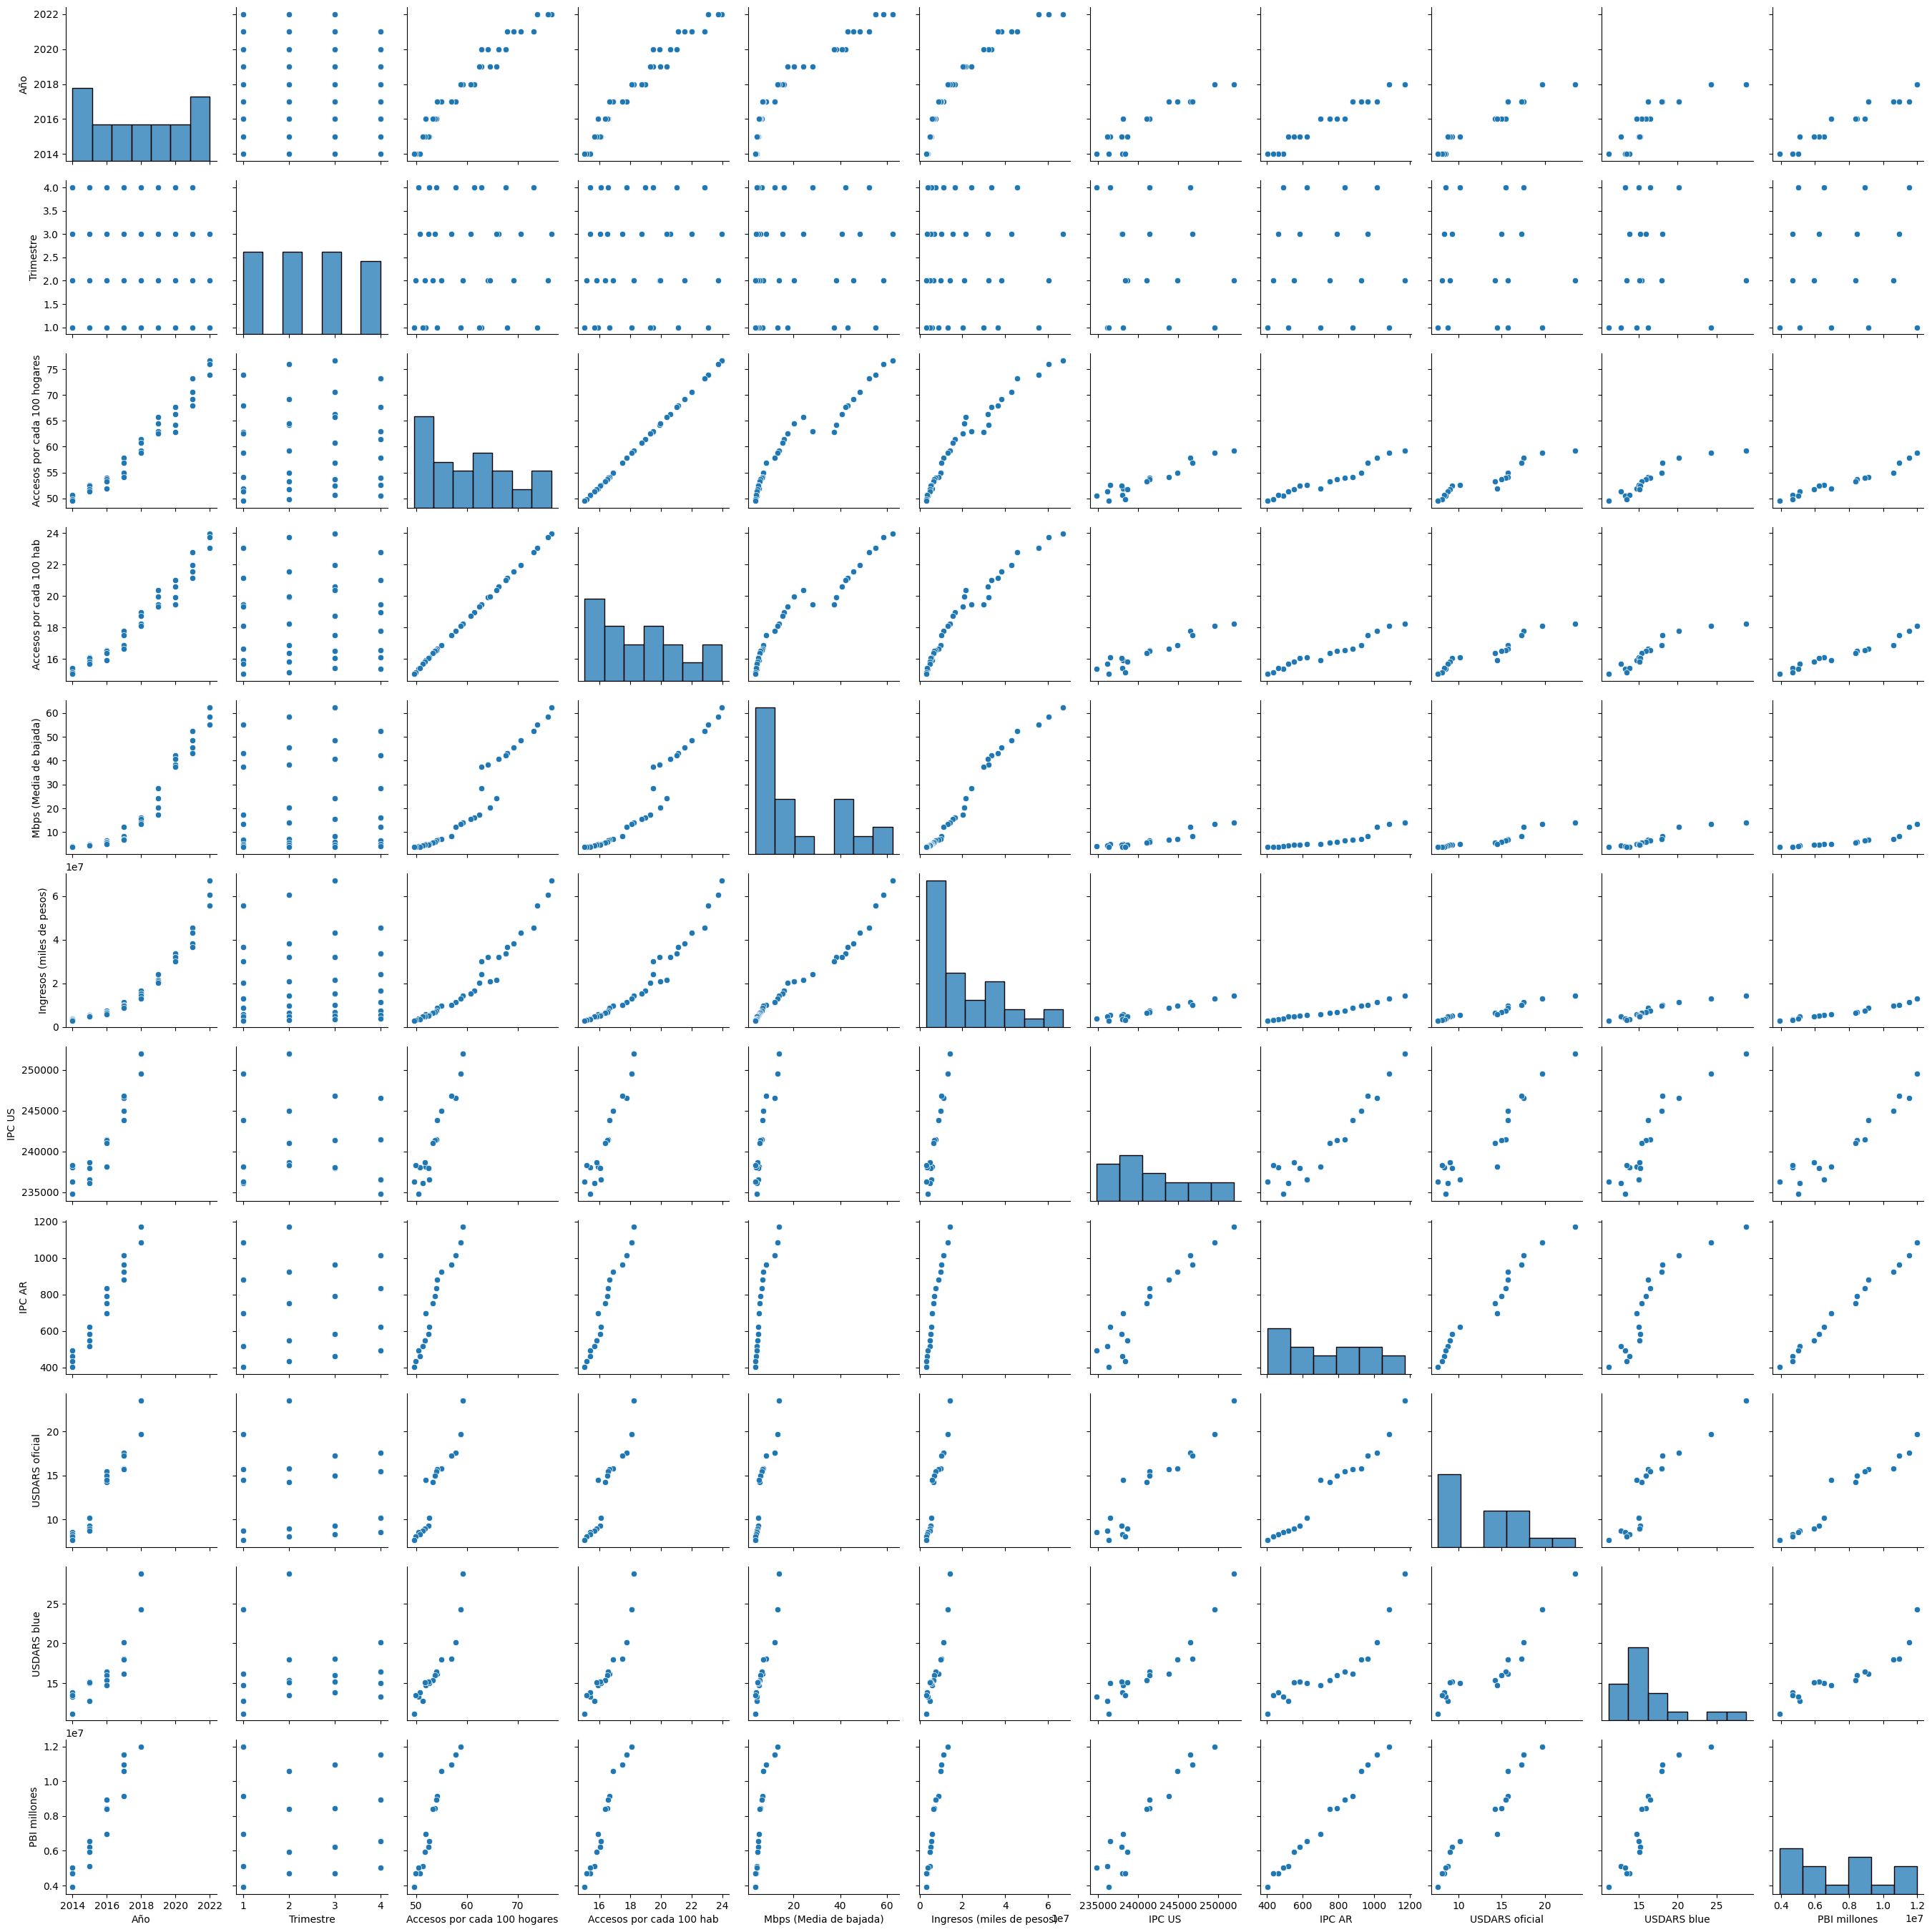

In [3]:
sns.pairplot(data=general_nacional)